# UnSupervised Learning

# 🧠 Customer Segmentation using K-Means Clustering

## 📌 Objective
In this project, we aim to segment customers into distinct groups based on their behavior and demographic patterns using **K-Means Clustering**. This unsupervised learning technique helps businesses understand customer characteristics and make data-driven decisions for **personalized marketing, product recommendations**, and **customer relationship management**.

## 📊 Dataset
We’ll be using a dataset (such as the Mall Customers dataset or a similar customer profile dataset) containing features like:
- Customer ID
- Gender
- Age
- Annual Income
- Spending Score

## 📈 What You'll Learn
- Preprocessing data for clustering
- Choosing the optimal number of clusters using the Elbow Method
- Applying K-Means to segment customers
- Visualizing clusters with matplotlib & seaborn

## 🛠️ Libraries Used
- `pandas` for data manipulation
- `matplotlib` & `seaborn` for visualization
- `scikit-learn` for clustering (KMeans)

---

✅ Let's dive into data preprocessing and begin customer segmentation!


In [1]:
# 📦 Data manipulation
import numpy as np
import pandas as pd

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 🧪 Machine Learning
from sklearn.cluster import KMeans


In [2]:
# Creating DataFrame from CSV File

customer_data=pd.read_csv('Mall_Customers.csv')

In [3]:
# Printing first 5 row of DataFrame
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Finding number of rows and columns
customer_data.shape

(200, 5)

In [5]:
#checking any missing Value

customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no any missing Value. Good Dataset

In [6]:
customer_data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [7]:
#Exploring dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Finding Statical Measures
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Choosing the Annual income column and Spending Score column

In [13]:
# X-> [Annual_Income (k$) , Spending Score(1-100)]

X=customer_data.iloc[:, [3,4]].values


In [14]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Chossing the number of cluster

WCSS -> Within Cluster Sum of Squares

In [16]:
# Finding wcss value for different number of clusters

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

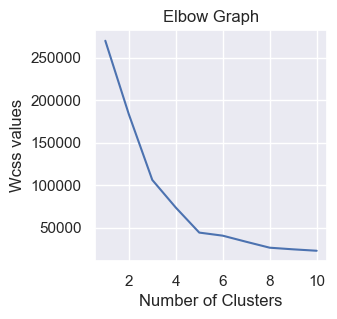

In [18]:
#Plot the elbow graph

sns.set()
plt.figure(figsize=(3,3))
plt.plot(range(1,11), wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss values')
plt.show()

The Optimum clusters=5


In [27]:
#Training the Model with clusters=5
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=2)

#return a label for each data point based on their cluster

Y=kmeans.fit_predict(X)
print(Y)


[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


5 Clusters= 0,1,2,3,4

Visualize the cluster

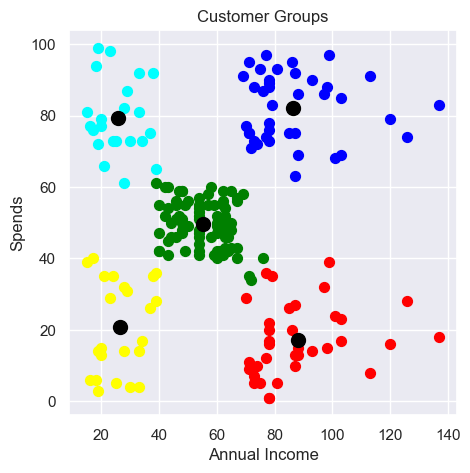

In [28]:
#Plotting all the cluster and their centriod

plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='cyan', label='Cluster 5')

#plot the centroid 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spends')
plt.show()